# Image and Time-series Data

## Image data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

%matplotlib inline

In [2]:
img = cv2.imread('data/gator.png',-1) #1-color image, 0-grayscale, -1-unchanged, include alpha channel

### Accessing and modifying pixel values

In [3]:
px = img[200,200]
print px

[ 22  70 250 255]


In [4]:
img.shape

(814, 1280, 4)

In [5]:
# access only the blue pixel
blue = img[200,200,0]
print blue

22


In [6]:
#modify the pixel values
img[200,200] = [0,0,0,255]
img[200,200]

array([  0,   0,   0, 255], dtype=uint8)

In [7]:
# another way to access and modify pixel values
img.item(200,200,0)

0

In [8]:
img.itemset((200,200,0),255)
img.item(200,200,0)

255

### Accessing image properties

In [9]:
print img.shape

(814, 1280, 4)


In [10]:
print img.size

4167680


In [11]:
print img.dtype

uint8


### Image ROI (region of image)

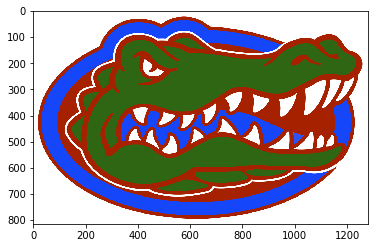

In [12]:
plt.imshow(img)

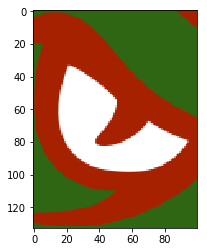

In [13]:
eye = img[151:284,405:505]
plt.imshow(eye)

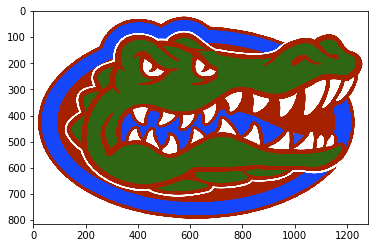

In [14]:
img[151:284, 605:705] = eye
plt.imshow(img)

### Splitting and merging image channels

In [15]:
b,g,r,a = cv2.split(img)

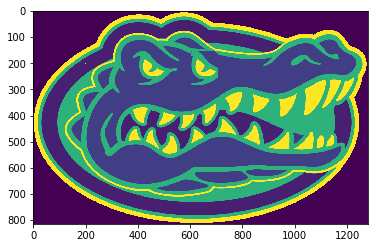

In [16]:
plt.imshow(b)

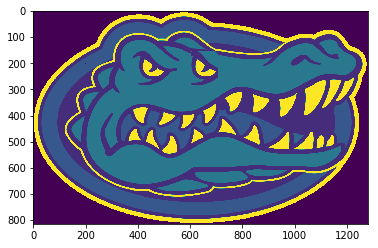

In [17]:
plt.imshow(g)

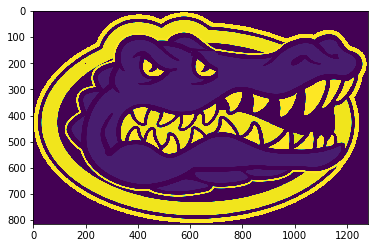

In [18]:
plt.imshow(r)

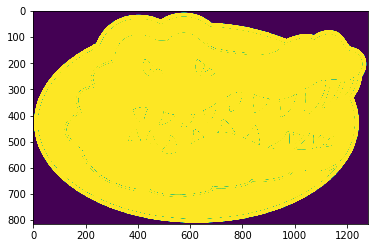

In [19]:
plt.imshow(a)

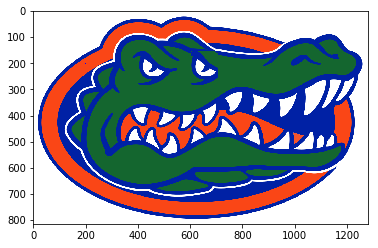

In [20]:
img2 = cv2.merge((r,g,b,a))
plt.imshow(img2)

### Padding (make borders for images)

In [21]:
BLUE = [255,0,0]
img1 = cv2.imread('data/gator.png')
replicate = cv2.copyMakeBorder(img1,200,200,200,200,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,200,200,200,200,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,200,200,200,200,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,200,200,200,200,cv2.BORDER_WRAP)
constant = cv2.copyMakeBorder(img1,200,200,200,200,cv2.BORDER_CONSTANT,value=BLUE)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3e21693e90>,
 Text(0.5,1,u'constant'))

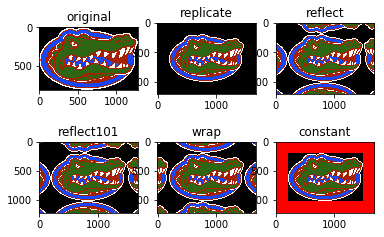

In [22]:
plt.subplot(231),plt.imshow(img1),plt.title('original')
plt.subplot(232),plt.imshow(replicate),plt.title('replicate')
plt.subplot(233),plt.imshow(reflect),plt.title('reflect')
plt.subplot(234),plt.imshow(reflect101),plt.title('reflect101') 
plt.subplot(235),plt.imshow(wrap),plt.title('wrap') 
plt.subplot(236),plt.imshow(constant),plt.title('constant') #add a constant colored border

### Image blending

In [23]:
img1 = cv2.imread('data/gator.png',-1)
img2 = cv2.imread('data/uf.png',-1)

In [24]:
b,g,r,a = cv2.split(img1)
img1 = cv2.merge((r,g,b,a))
b,g,r,a = cv2.split(img2)
img2 = cv2.merge((r,g,b,a))

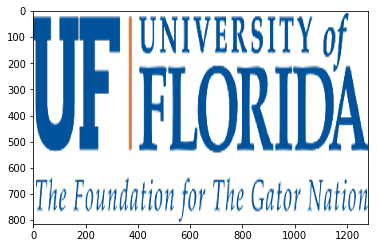

In [25]:
img2 = cv2.resize(img2,(1280,814),interpolation=cv2.INTER_CUBIC)
plt.imshow(img2)

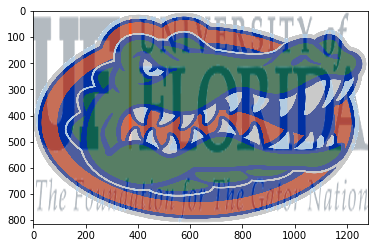

In [26]:
img3 = cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(img3)

### Bitwise operations

In [27]:
img1 = cv2.imread('data/uf.png',1)
img2 = cv2.imread('data/stadium.jpg',1)

In [28]:
#create an roi to put logo on top-left corner
rows,cols,channels = img1.shape
roi = img2[0:rows,0:cols]

In [29]:
#create a mask of logo and create its inverse mask also
img1gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img1gray,10,255,cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

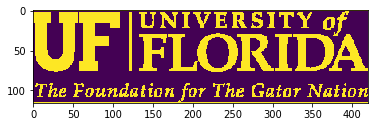

In [30]:
plt.imshow(mask)

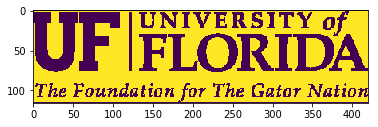

In [31]:
plt.imshow(mask_inv)

In [32]:
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [33]:
mask_inv

array([[  0,   0,   0, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [34]:
ret

10.0

In [35]:
img2_bg = cv2.bitwise_and(roi,roi,mask=mask_inv)
img1_fg = cv2.bitwise_and(img1,img1,mask=mask)

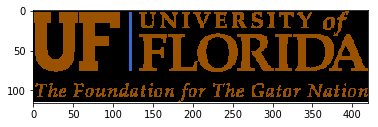

In [36]:
plt.imshow(img1_fg)

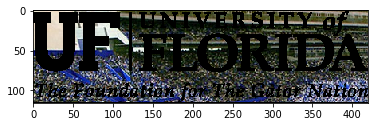

In [37]:
plt.imshow(img2_bg)

In [38]:
img3 = cv2.add(img2_bg,img1_fg)
img2[0:rows,0:cols]=img3

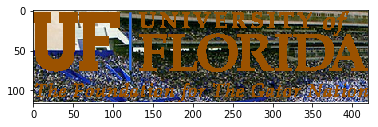

In [39]:
plt.imshow(img3)

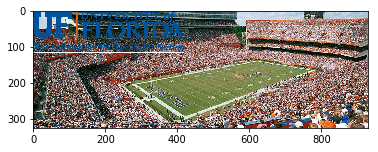

In [40]:
b,g,r = cv2.split(img2)
img2 = cv2.merge((r,g,b))
plt.imshow(img2)

### Geometric transofmations of images

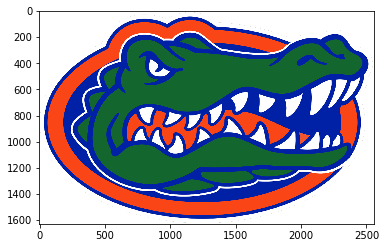

In [41]:
# scaling
img = cv2.imread('data/gator.png',-1)
height,width = img.shape[:2]
img2 = cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGRA2RGBA)
plt.imshow(img2)

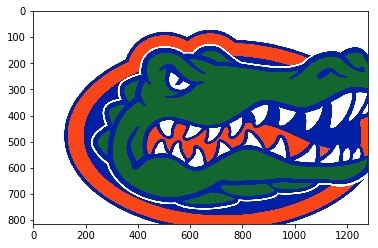

In [42]:
#translation (for a shift of 100,50)
M = np.float32([[1,0,100],[0,1,50]])
img2 = cv2.warpAffine(img,M,(width,height))
img2 = cv2.cvtColor(img2,cv2.COLOR_BGRA2RGBA)
plt.imshow(img2)

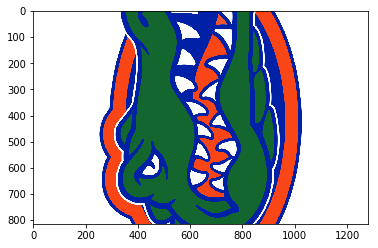

In [43]:
# rotation
M = cv2.getRotationMatrix2D((width/2,height/2),90,1)
img2 = cv2.warpAffine(img,M,(width,height))
img2 = cv2.cvtColor(img2,cv2.COLOR_BGRA2RGBA)
plt.imshow(img2)

## Time-series data

In [44]:
import pandas as pd

In [45]:
dateparser = lambda dates: pd.datetime.strptime(dates,'%Y-%m')

In [46]:
data = pd.read_csv('data/AirPassengers.csv', 
                   parse_dates=['Month'],
                   index_col=['Month'],
                   date_parser=dateparser)

In [47]:
print data.head()

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [48]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [49]:
ts = data['#Passengers']

In [50]:
ts.head(10)

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: #Passengers, dtype: int64

In [51]:
ts['1949-01-01':'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [52]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

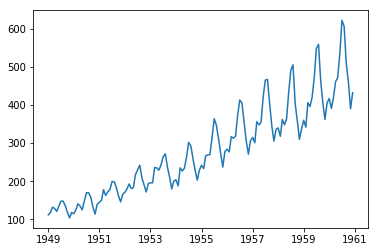

In [53]:
plt.plot(ts)

In [54]:
# generate rolling statistics plots with Dickey-Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


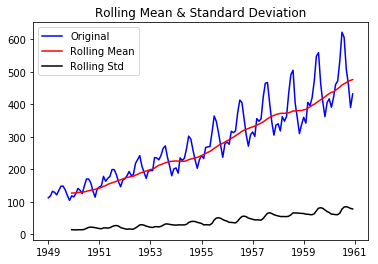

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [55]:
test_stationarity(ts)

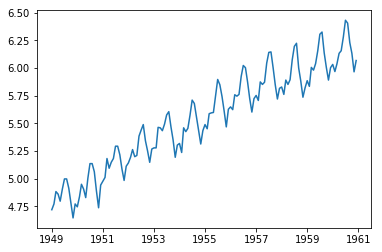

In [56]:
ts_log = np.log(ts)
plt.plot(ts_log)

### Moving average

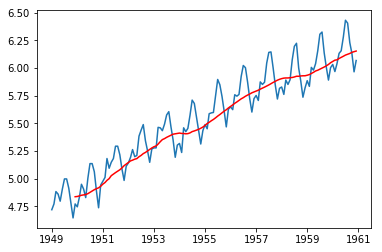

In [57]:
moving_avg = ts_log.rolling(window=12,center=False).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='red')

In [58]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
1950-05-01   -0.027529
1950-06-01    0.139881
1950-07-01    0.260184
1950-08-01    0.248635
Name: #Passengers, dtype: float64

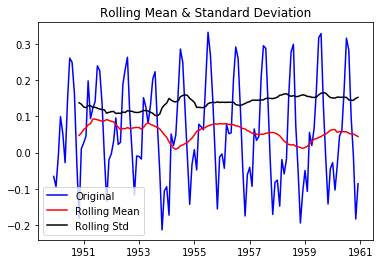

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [59]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

### exponentially weighted moving average

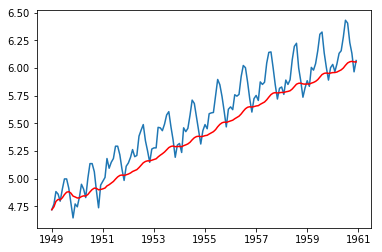

In [60]:
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg,color='red')

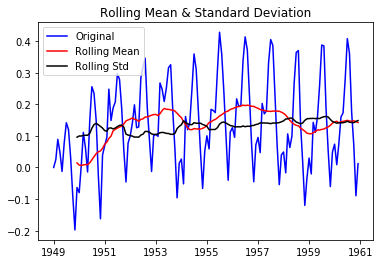

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [61]:
ts_log_ewm_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewm_diff)

### differencing: taking the difference with a particular time lag

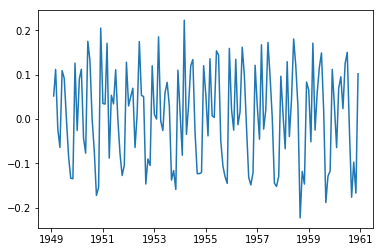

In [62]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

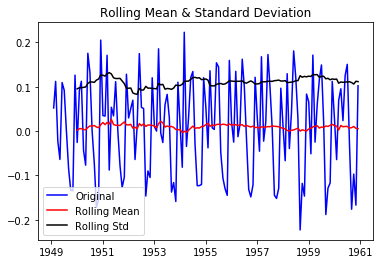

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [63]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### decomposing

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

In [65]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

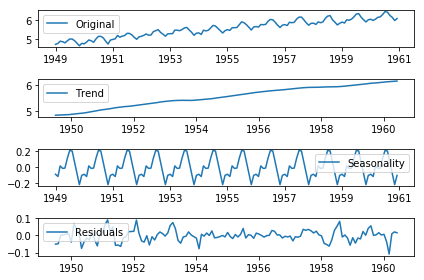

In [66]:
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

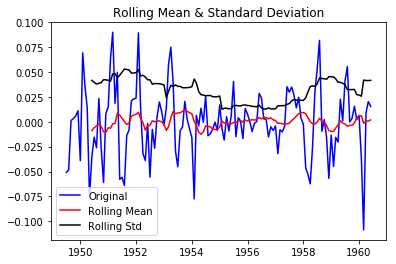

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [67]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

### Interpolation

In [68]:
ts2 = pd.read_csv('data/AirPassengers2.csv', 
                   parse_dates=['Month'],
                   index_col=['Month'],
                   date_parser=dateparser)['#Passengers']

In [69]:
ts2.head(12)

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01      NaN
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01      NaN
Name: #Passengers, dtype: float64

In [70]:
ts['1949-05']

Month
1949-05-01    121
Name: #Passengers, dtype: int64

In [71]:
ts2.interpolate(method='linear').head(12)

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    132.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    109.5
Name: #Passengers, dtype: float64

In [72]:
ts2.interpolate(method='nearest').head(12)

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    129.0
1949-06-01    135.0
1949-07-01    148.0
1949-08-01    148.0
1949-09-01    136.0
1949-10-01    119.0
1949-11-01    104.0
1949-12-01    104.0
Name: #Passengers, dtype: float64

In [73]:
ts2.interpolate(method='polynomial',order=3).head(12)

Month
1949-01-01    112.000000
1949-02-01    118.000000
1949-03-01    132.000000
1949-04-01    129.000000
1949-05-01    127.294108
1949-06-01    135.000000
1949-07-01    148.000000
1949-08-01    148.000000
1949-09-01    136.000000
1949-10-01    119.000000
1949-11-01    104.000000
1949-12-01    105.164570
Name: #Passengers, dtype: float64